# 1D Poisson Equation 

$$\dfrac{\mathrm{d}^2 u}{ \mathrm{d} x^2}=f, \quad x \in [a, b]$$

$$u(a)=u_a, \quad u(b)=u_b$$

## Domain Discretisation

![1d mesh](../images/1dmesh.png)

Divide the domain uniformlly into $M$ parts by using $N=M+1$ points, so the step size is

$$h=\dfrac{b-a}{M},$$

the coordinates of the points are

$$x(i)=a+(i-1)h, \quad i=1,2,\ldots,N$$

boundary condition

$$u[1]=u_a, \quad u[N]=u_b$$

## Equation Discretisation

At point $i$,

$$\dfrac{u_{i-1}-2u_{i}+u_{i+1}}{h^2}=f_i$$

so

$$u_{i-1}-2u_{i}+u_{i+1}=h^2 f_i$$

### Point Iteration Method

A point iteration can be used to find $u_i$ as

$$ u_{i} = \frac{1}{2} \Bigl( u_{i-1} + u_{i+1} - h^2 f_i \Bigr)$$

### Linear Algebra Method

Supposing $N=11$, write down all the 11 equations (at mesh points):

$u_1=u_a$

$u_{1}-2u_{2}+u_{3}=h^2 f_2$

$u_{2}-2u_{3}+u_{4}=h^2 f_3$

$u_{3}-2u_{4}+u_{5}=h^2 f_4$

$u_{4}-2u_{5}+u_{6}=h^2 f_5$

$u_{5}-2u_{6}+u_{7}=h^2 f_6$

$u_{6}-2u_{7}+u_{8}=h^2 f_7$

$u_{7}-2u_{8}+u_{9}=h^2 f_8$

$u_{8}-2u_{9}+u_{10}=h^2 f_9$

$u_{9}-2u_{10}+u_{11}=h^2 f_{10}$

$u_{11}=u_b$



<!-- $u_{N-4}-2u_{N-3}+u_{N-2}=h^2 f_{N-3}$

$u_{N-3}-2u_{N-2}+u_{N-1}=h^2 f_{N-2}$

$u_{N-2}-2u_{N-1}+u_{N}=h^2 f_{N-1}$ -->


Assemble these equations into a linear system $Au=r$
$$

\begin{bmatrix}
1 &  0 & 0\\
1 & -2 &  1 & 0\\
0 &  1 & -2 & 1  & 0\\
0 &  0 &  1 & -2 &  1 & 0   \\
0 &  0 &  0 &  1 & -2 & 1  & 0\\
0 &  0 &  0 &  0 &  1 & -2 & 1  & 0\\
0 &  0 &  0 &  0 &  0 &  1 & -2 & 1  & 0\\
0 &  0 &  0 &  0 &  0 &  0 &  1 & -2 & 1  & 0\\
0 &  0 &  0 &  0 &  0 &  0 &  0 &  1 & -2 & 1  & 0\\
0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  1 & -2 & 1  \\
0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 & 1  \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \\
u_6 \\
u_7 \\
u_8 \\
u_9 \\
u_{10} \\
u_{11} \\
\end{bmatrix}
=
\begin{bmatrix}
u_{a} \\
h^2 f_2 \\
h^2 f_3 \\
h^2 f_4 \\
h^2 f_5 \\
h^2 f_6 \\
h^2 f_7 \\
h^2 f_8 \\
h^2 f_9 \\
h^2 f_{10} \\
u_{b} \\
\end{bmatrix}
$$

## Python Code for Linear Algebra Method

### Import python libraries

In [3]:
%pylab inline
import math
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sLA

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Define mesh and initial numerical & exact solutions

In [4]:
#Domain Length
L=1.0
xa=0.0
xb=xa+L

#Number of cells
M=int(10)

#Number of points
N=M+1

#step size
h=L/M

#mesh points
x=np.arange(0,L+h,h)+xa

print("h=%f" %(h))
print("x:", x)

#exact solution: ue=x^2
ue=np.power(x,2)

print("ue:", ue)

#source term: f
f=np.ones(N)*2

print("f:",f)

#numerical solution: u
u=np.zeros(N)

##boundary condition
u[0]=ue[0]
u[-1]=ue[-1]

print("u:", u)



h=0.100000
x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
ue: [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
f: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
u: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Assemble the dense linear system: $Au=r$

In [5]:
##assemble the right hand side: r
r=np.zeros(N)


r[0]=ue[0]
r[-1]=ue[-1]

for i in range(1,N-1):
    # print("i=%d" %(i))
    r[i]=h**2*f[i]

print("r:", r)

##assemble the matrix: A

A=np.zeros([N, N])
A[0,0]=1
A[-1,-1]=1

for i in range(1,N-1):
    A[i,i-1]=1
    A[i,i]=-2
    A[i,i+1]=1

print(A)


r: [0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 1.  ]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


### Solve the linear system: Au=r

ue: [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
u: [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
error= 2.0969355746610596e-16


Text(0.5, 1.0, 'Dense Matrix Solution')

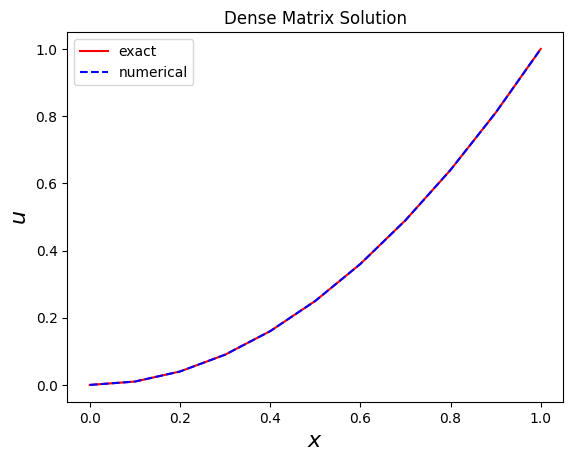

In [6]:
u=LA.solve(A,r)

print("ue:", ue)
print("u:",u)

error=LA.norm(u-ue)
print("error=",error)

#plot solutions
plt.plot(x,ue,'r-',label="exact")
plt.plot(x,u,'b--',label="numerical")
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$u$', fontsize=16)
plt.legend(loc="upper left")
plt.title("Dense Matrix Solution")

### Try sparse linear algebra

#### Convert Dense matrix to CSR matrix

In [7]:
Acsr=sparse.csr_matrix(A)
Acsr.toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [8]:
Acsr

<11x11 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

#### Assemble the sparse matrix in COO format

In [9]:
#number of non-zero elements in the sparse matrix A
NNZ=(N-2)*3+2
print("NNZ=",NNZ)

# I & J indices
Idx=np.zeros(NNZ,dtype=int)
Jdx=np.zeros(NNZ,dtype=int)
# print("Idx:", Idx)
# print("Jdx:", Jdx)

#non-zero elements in the matrix 
vals=np.zeros(NNZ,dtype=float)
# print("vals:",vals)

counter=-1
for i in range(N):
    #print("i=",i)

    if(i==0):
        counter=counter+1
        Idx[counter]=i
        Jdx[counter]=i
        vals[counter]=1
    elif(i==N-1):   
        counter=counter+1
        Idx[counter]=i
        Jdx[counter]=i
        vals[counter]=1
    else:    
        #left
        counter=counter+1
        Idx[counter]=i
        Jdx[counter]=i-1
        vals[counter]=1

        #center
        counter=counter+1
        Idx[counter]=i
        Jdx[counter]=i
        vals[counter]=-2

        #right
        counter=counter+1
        Idx[counter]=i
        Jdx[counter]=i+1
        vals[counter]=1

print("Idx:", Idx)
print("Jdx:", Jdx)
print("vals:",vals)

Acoo=sparse.coo_matrix((vals,(Idx,Jdx)),shape=(N,N))

#Convert COO format to CSR format
Acsr=Acoo.tocsr()


NNZ= 29
Idx: [ 0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8
  8  9  9  9 10]
Jdx: [ 0  0  1  2  1  2  3  2  3  4  3  4  5  4  5  6  5  6  7  6  7  8  7  8
  9  8  9 10 10]
vals: [ 1.  1. -2.  1.  1. -2.  1.  1. -2.  1.  1. -2.  1.  1. -2.  1.  1. -2.
  1.  1. -2.  1.  1. -2.  1.  1. -2.  1.  1.]


In [10]:
Acsr

<11x11 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [11]:
Acsr.toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

#### Solve the sparse linear system Au=r

ue= [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
u= [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
u2= [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
u3= [0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]
error= 2.0969355746610596e-16
error2= 4.0964458188396723e-16
error3= 3.8654372650192143e-16


Text(0.5, 1.0, 'Sparse Matrix Solution')

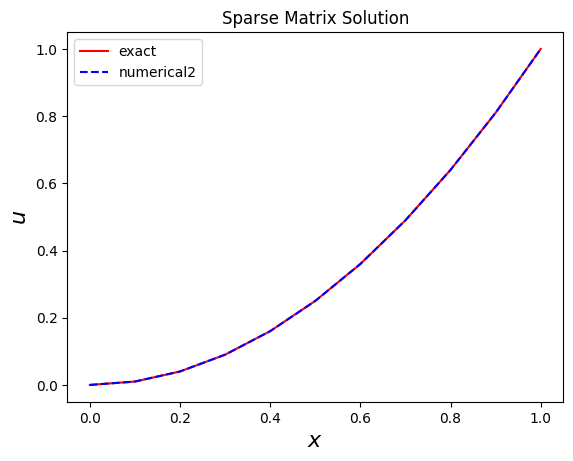

In [12]:
u2=sLA.spsolve(Acsr,r)
error2=LA.norm(u2-ue)

u3=sLA.spsolve(Acoo.tocsc(),r)
error3=LA.norm(u3-ue)

print("ue=",ue)
print("u=",u)
print("u2=",u2)
print("u3=",u3)
print("error=",error)
print("error2=",error2)
print("error3=",error3)

#plot solutions
plt.figure(1)
plt.plot(x,ue,'r-',label="exact")
plt.plot(x,u2,'b--',label="numerical2")
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$u$', fontsize=16)
plt.legend(loc="upper left")
plt.title("Sparse Matrix Solution")

##### Plot errors

Text(0.5, 1.0, 'Numerical error')

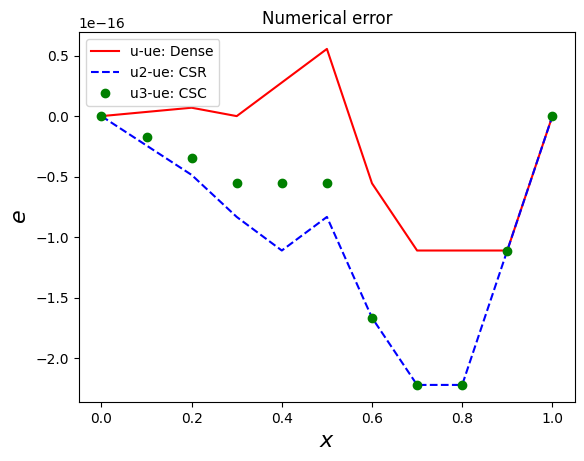

In [13]:
plt.figure(2)
plt.plot(x,u-ue,'r',label="u-ue: Dense")
plt.plot(x,u2-ue,'b--',label="u2-ue: CSR ")
plt.plot(x,u3-ue,'go',label="u3-ue: CSC ")
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$e$', fontsize=16)
plt.legend(loc="upper left")
plt.title("Numerical error")

In [31]:
print("x   =",x)
print("x[:]=",x[:])
print("x[ :3]=",x[ :3])
print("x[0:3]=",x[0:3])
print("x[1:3]=",x[1:3])
print("x[2:3]=",x[2:3])
print("x[3:3]=",x[3:3])


x   = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x[:]= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x[ :3]= [0.  0.1 0.2]
x[0:3]= [0.  0.1 0.2]
x[1:3]= [0.1 0.2]
x[2:3]= [0.2]
x[3:3]= []
